# k fold CROSS VALIDATION

In [6]:
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn import model_selection

In [7]:
dir(model_selection)
print(pd.read_csv.__doc__)


Read a comma-separated values (csv) file into DataFrame.

Also supports optionally iterating or breaking of the file
into chunks.

Additional help can be found in the online docs for
`IO Tools <https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html>`_.

Parameters
----------
filepath_or_buffer : str, path object or file-like object
    Any valid string path is acceptable. The string could be a URL. Valid
    URL schemes include http, ftp, s3, and file. For file URLs, a host is
    expected. A local file could be: file://localhost/path/to/table.csv.

    If you want to pass in a path object, pandas accepts any ``os.PathLike``.

    By file-like object, we refer to objects with a ``read()`` method, such as
    a file handler (e.g. via builtin ``open`` function) or ``StringIO``.
sep : str, default ','
    Delimiter to use. If sep is None, the C engine cannot automatically detect
    the separator, but the Python parsing engine can, meaning the latter will
    be used and automat

In [8]:
# defining column
names=['x','y','class']
# loading data
df=pd.read_csv("knn/demo_data/3.concertriccir2.csv",header=None,names=names)
print(df.head())
print(df.shape)
#create design matrix x and target vector y
x=np.array(df.iloc[:,0:4])
y=np.array(df['class'])

          x         y  class
0  0.700335 -0.247068    0.0
1 -3.950019  2.740080    1.0
2  0.150222 -2.157638    1.0
3 -1.672050 -0.941519    1.0
4  2.560483 -1.846577    1.0
(500, 3)


## simple cross validation

In [9]:
print(train_test_split.__doc__)
print('*'*50)
print(accuracy_score.__doc__)

Split arrays or matrices into random train and test subsets

    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float, int or None, optional (default=None)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also None, it will
        be set to 0.25.

    train_size : float, int, or None, (default=None)
        If float, should be 

In [10]:
#dividing the data nto training data and test data set
x_1,x_test,y_1,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

#dividing the train set into cross validation train and cross validatiom
x_train,x_cv,y_train,y_cv=train_test_split(x_1,y_1,test_size=0.3)


#now for the different value of k we will train the knn
for i in tqdm(range(1,31,2)):
    knn=KNeighborsClassifier(n_neighbors=i)
    #fitting the cross-validation train data
    knn.fit(x_train,y_train)
    #pridicting the class for cv set
    pred=knn.predict(x_cv)
    #evaluating the accuracy
    acc=accuracy_score(y_cv,pred,normalize=True)*float(100)
    print('\ncv accuracy for k=%d is %d%%'%(i,acc))
knn=KNeighborsClassifier(1)
knn.fit(x_train,y_train)
prec=knn.predict(x_test)
acc=accuracy_score(y_test,prec,normalize=True)*float(100)
print('\n***test accuracy for k=1 is %d%%'%(acc))
print(x_train)

100%|██████████| 15/15 [00:00<00:00, 170.79it/s]


cv accuracy for k=1 is 100%

cv accuracy for k=3 is 100%

cv accuracy for k=5 is 100%

cv accuracy for k=7 is 100%

cv accuracy for k=9 is 100%

cv accuracy for k=11 is 99%

cv accuracy for k=13 is 99%

cv accuracy for k=15 is 99%

cv accuracy for k=17 is 99%

cv accuracy for k=19 is 97%

cv accuracy for k=21 is 96%

cv accuracy for k=23 is 93%

cv accuracy for k=25 is 93%

cv accuracy for k=27 is 87%

cv accuracy for k=29 is 80%

***test accuracy for k=1 is 98%
[[ 4.04505298  2.82888877  1.        ]
 [ 2.41778951  3.58495062  1.        ]
 [ 4.18376399  3.87330317  0.        ]
 [ 0.92571613 -0.0723914   0.        ]
 [ 2.46753646 -1.07650912  1.        ]
 [-1.35117536  0.82860248  0.        ]
 [ 2.29717124 -0.86515422  1.        ]
 [-1.54843918  0.23954293  0.        ]
 [ 3.51108849  3.96114383  1.        ]
 [ 3.62576842  5.09512431  0.        ]
 [ 3.55251051  2.14889919  1.        ]
 [ 0.87834358  1.35216028  1.        ]
 [ 5.13893742  2.05073664  0.        ]
 [ 4.46703718  5.08769297

##  10 fold cross validation

In [6]:
print(cross_val_score.__doc__)

Evaluate a score by cross-validation

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.

    X : array-like
        The data to fit. Can be for example a list, or an array.

    y : array-like, optional, default: None
        The target variable to try to predict in the case of
        supervised learning.

    groups : array-like, with shape (n_samples,), optional
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" :term:`cv`
        instance (e.g., :class:`GroupKFold`).

    scoring : string, callable or None, optional, default: None
        A string (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)`` which should return only
        a single value.

        Similar to :func:`cross_va


the optimal number of neighbor is 1.


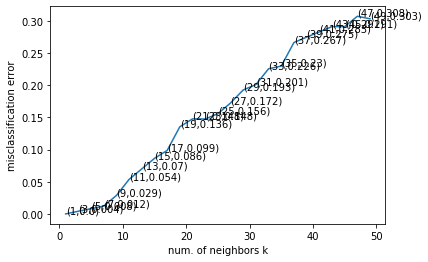

the misclassification error for eack k value is: [0.    0.004 0.008 0.012 0.029 0.054 0.07  0.086 0.099 0.136 0.148 0.148
 0.156 0.172 0.193 0.201 0.226 0.23  0.267 0.275 0.283 0.291 0.291 0.308
 0.303]


In [7]:
#creating list of odd k for knn
my_list=list(range(0,50))
neighbors=list(filter(lambda x:x%2!=0,my_list))
#empty list that store cv score
cv_score=[]
#performing 10-fold cross-validation
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
    #print(score)
    cv_score.append(score.mean())
#misclassification error or training error on traing data
mse=[1-x for x in cv_score]
#determinng the best k
optimal_k=neighbors[mse.index(min(mse))]
print('\nthe optimal number of neighbor is %d.'%optimal_k)
#plot misclassification error vs k
plt.plot(neighbors,mse)
for xy in zip(neighbors,np.round(mse,3)):
    plt.annotate('(%s,%s)'%xy,xy=xy,textcoords='data')
plt.xlabel('num. of neighbors k')
plt.ylabel('misclassification error')
plt.show()
print("the misclassification error for eack k value is:",np.round(mse,3))

In [8]:
print(np.round.__doc__)


    Round an array to the given number of decimals.

    See Also
    --------
    around : equivalent function; see for details.
    


In [9]:
print(plt.annotate.__doc__)


        Annotate the point *xy* with text *text*.

        In the simplest form, the text is placed at *xy*.

        Optionally, the text can be displayed in another position *xytext*.
        An arrow pointing from the text to the annotated point *xy* can then
        be added by defining *arrowprops*.

        Parameters
        ----------
        text : str
            The text of the annotation.  *s* is a deprecated synonym for this
            parameter.

        xy : (float, float)
            The point *(x,y)* to annotate.

        xytext : (float, float), optional
            The position *(x,y)* to place the text at.
            If *None*, defaults to *xy*.

        xycoords : str, `.Artist`, `.Transform`, callable or tuple, optional

            The coordinate system that *xy* is given in. The following types
            of values are supported:

            - One of the following strings:

              =================   =============================================
    

In [10]:
#instantiate learning model k=optimal k
knn_optimal=KNeighborsClassifier(n_neighbors=optimal_k)

#fitting the model
knn_optimal.fit(x_train,y_train)
#predicting the response
pre=knn_optimal.predict(x_test)
#evaluating accuracy
acc=accuracy_score(y_test,pre,normalize=True)*100
print('\nThe accuracy of knn classifier for k=%d is %f%%'%(optimal_k,acc))



The accuracy of knn classifier for k=1 is 99.333333%
